In [2]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, romberg, trapezoid

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Simón Cortés Ocampo
*Métodos computacionales 2024-II*

---

#1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} dx\, e^{3x}\cdot \sin(x)$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



In [7]:
def romberg_(f,a,b, tol=1e-8, max_iter = 10):
  R = np.zeros((max_iter, max_iter))
  h = (b-a)

  R[0,0] = (h/2)*(f(a)+f(b))

  for i in range(1, max_iter):
    h /= 2
    sumatoria = sum(f(a+(2*k-1)*h) for k in range(1,2**i//2+1))
    R[i,0] = 0.5 * R[i-1,0] + h*sumatoria

    for j in range(1,i+1):
      R[i,j] = R[i, j-1] + (R[i, j-1] - R[i-1, j-1])/(4**j - 1)

    if abs(R[i,i] - R[i-1,i-1])< tol:
      return R[i,i]

  return R[max_iter-1,max_iter-1]


In [8]:
f = lambda x: np.exp(3*x)*np.sin(x)
a = 0
b = np.pi/4

integral = romberg_(f,a,b)
print(f'El valor de la integral es {integral}')

El valor de la integral es 1.5920977078586134


In [9]:
valor_sp = romberg(f,a,b)
print(f'La integral con el método de scipy es: {valor_sp}')

La integral con el método de scipy es: 1.592097707858613


<ipython-input-9-4da0cfacd108>:1: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  valor_sp = romberg(f,a,b)


In [10]:
from sympy import integrate, symbols, exp, sin, pi

x = sp.symbols('x')
f = sp.exp(3*x)*sp.sin(x)

valor_exacto = integrate(f,(x,0,np.pi/4))
print(f'El valor exacto usando el método de sympy es {valor_exacto}')

error = np.abs(valor_exacto - integral)
print(f'El valor del error es {error}')


El valor exacto usando el método de sympy es 1.59209770785868
El valor del error es 6.57252030578093E-14


#2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


In [12]:
def medio_punto(f,a,b,n):
  h = (b-a)/n
  integral = 0
  for i in range(n):
    integral += f(a+(h/2)+(i*h))
  return integral * h


In [13]:
f = lambda x: 1/(x*np.log(x))
a = np.e
b = np.e + 1
n = 100

x = np.linspace(a,b,n)
y = f(x)

integral_trapezoid = trapezoid(y,x)
integral_simpson = simpson(y,x=x)
integral_midpoint = medio_punto(f,a,b,n)
print(f'La integral con el método trapezoidal compuesto es {integral_trapezoid}')
print(f'La integral con el método de simpson 1/3 es {integral_simpson}')
print(f'La integral con el método de medio punto es {integral_midpoint}')

La integral con el método trapezoidal compuesto es 0.2725153570094439
La integral con el método de simpson 1/3 es 0.2725138804920379
La integral con el método de medio punto es 0.27251315694316075


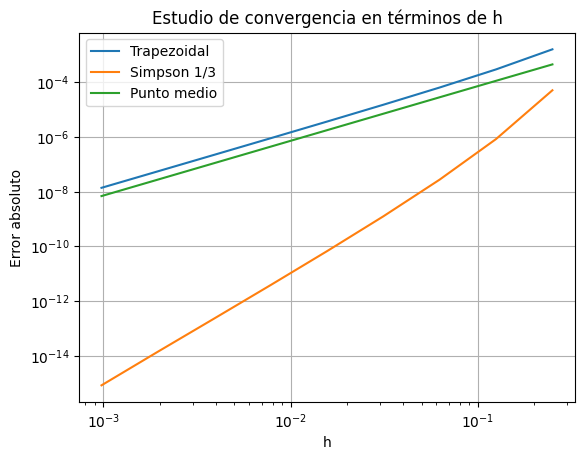

In [14]:
x = sp.symbols('x')
f_ = 1/(x*sp.log(x))
a = np.e
b = np.e + 1
integral_exacta = integrate(f_,(x,a,b))

N_vals = [4,8,16,32,64,128,256,512,1024]
h_vals = [(b-a)/N for N in N_vals]

errores_trapezoidal = []
errores_simpson = []
errores_midpoint = []

for N in N_vals:
  x_ = np.linspace(a,b,N)
  y_ = f(x_)
  I_trap = trapezoid(y_,x_)
  I_simp = simpson(y_,x=x_)
  I_mid = medio_punto(f,a,b,N)

  errores_trapezoidal.append(np.abs(I_trap - integral_exacta))
  errores_simpson.append(np.abs(I_simp - integral_exacta))
  errores_midpoint.append(np.abs(I_mid - integral_exacta))

plt.loglog(h_vals, errores_trapezoidal, label='Trapezoidal')
plt.loglog(h_vals, errores_simpson, label='Simpson 1/3')
plt.loglog(h_vals, errores_midpoint, label='Punto medio')
plt.xlabel('h')
plt.ylabel('Error absoluto')
plt.legend()
plt.grid()
plt.title('Estudio de convergencia en términos de h')
plt.show()

Podemos observar que el mejor método parece ser el de Simpson 1/3 ya que tiene una convergencia más rápida y tiene el menor error para valores más pequeños de h.

#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:
from scipy.special import roots_legendre

def gauss_quad_standard(f, a, b, n):
  x,w = roots_legendre(n)
  integral = ((b-a)/2) * np.sum(w * f(((b-a)/2)*x + ((a+b)/2)))
  return integral

In [ ]:
f = lambda x: 1/(x*np.log(x))
a = np.e
b = np.e + 1
n = 100

integral_gauss = gauss_quad_standard(f,a,b,n)
print(f'La integral con el método de cuadratura gaussiana es {integral_gauss}')

La integral con el método de cuadratura gaussiana es 0.27251388050258346


#4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


In [ ]:
x = sp.symbols('x')
P_3 = sp.legendre(3,x)
P_4 = sp.legendre(4,x)
P_3_prime = P_3.diff(x)
P_4_prime = P_4.diff(x)

In [ ]:
P_3

5*x**3/2 - 3*x/2

In [ ]:
P_4

35*x**4/8 - 15*x**2/4 + 3/8

In [ ]:
from scipy.optimize import newton, root_scalar

P_3_num = sp.lambdify(x, P_3, 'numpy')
P_3_prime_num = sp.lambdify(x, P_3_prime, 'numpy')
P_4_num = sp.lambdify(x, P_4, 'numpy')
P_4_prime_num = sp.lambdify(x, P_4_prime, 'numpy')

def raices(P_num, P_prime_num, x, n):
  for i in range(len(x)-1):
    raiz_newton = newton(P_num, x[i], fprime=P_prime_num)
    raiz_secante = root_scalar(P_num, x0=x[i], x1=x[i]+0.2)
    print(f'Raiz {i+1} del polinomio de Legendre de grado {n}:')
    print(f'Newton-Raphson: {raiz_newton}')
    print(f'Secante: {raiz_secante.root}')
    print()

In [ ]:
x0_3 = [-1, 0, 0.5,1]
x0_4 = [-1, -0.5, 0.2, 0.8,1]

raices(P_3_num, P_3_prime_num, x0_3, 3)
raices(P_4_num, P_4_prime_num, x0_4, 4)

Raiz 1 del polinomio de Legendre de grado 3:
Newton-Raphson: -0.7745966692414835
Secante: -0.7745966692414834

Raiz 2 del polinomio de Legendre de grado 3:
Newton-Raphson: 0.0
Secante: 0.0

Raiz 3 del polinomio de Legendre de grado 3:
Newton-Raphson: 0.7745966692414833
Secante: 0.7745966692414834

Raiz 1 del polinomio de Legendre de grado 4:
Newton-Raphson: -0.861136311594053
Secante: -0.8611363115940527

Raiz 2 del polinomio de Legendre de grado 4:
Newton-Raphson: -0.33998104358485626
Secante: -0.33998104358486075

Raiz 3 del polinomio de Legendre de grado 4:
Newton-Raphson: 0.3399810435848563
Secante: 0.3399810435848565

Raiz 4 del polinomio de Legendre de grado 4:
Newton-Raphson: 0.8611363115940526
Secante: 0.8611363115940527



In [ ]:
def peso(P_num, P_prime_num, x, n):
  for i in range(len(x)-1):
    w = 2/((1-x[i]**2)*(P_prime_num(x[i])**2))
    print(f'El peso del polinomio de Legendre de grado {n} para la raiz {i+1} es {w}')
    print()

In [ ]:
x_3 = [newton(P_3_num, x, fprime = P_3_prime_num) for x in [-1, 0, 0.5,1]]
x_4 = [newton(P_4_num, x, fprime=P_4_prime_num) for x in [-1, -0.5, 0.2, 0.8,1]]

peso(P_3_num, P_3_prime_num, x_3, 3)
peso(P_4_num, P_4_prime_num, x_4, 4)

El peso del polinomio de Legendre de grado 3 para la raiz 1 es 0.5555555555555552

El peso del polinomio de Legendre de grado 3 para la raiz 2 es 0.8888888888888888

El peso del polinomio de Legendre de grado 3 para la raiz 3 es 0.5555555555555557

El peso del polinomio de Legendre de grado 4 para la raiz 1 es 0.3478548451374528

El peso del polinomio de Legendre de grado 4 para la raiz 2 es 0.6521451548625462

El peso del polinomio de Legendre de grado 4 para la raiz 3 es 0.6521451548625463

El peso del polinomio de Legendre de grado 4 para la raiz 4 es 0.34785484513745396

